In [4]:
from neo4j import GraphDatabase
import networkx as nx
import matplotlib.pyplot as plt
import json
import pandas as pd

with open("../../config.json","r") as f:
            CONFIG = json.load(f)
uri = CONFIG["uri"]
driver = GraphDatabase.driver(uri, auth = (CONFIG["username"],CONFIG["password"]))

## NetworkX Notes

### Constructors

- `G = nx.graph` -> Non Directional graph
- `G = nx.digraph` -> Directional graph
- `G = nx.multigraph` -> Non Directional multiple edges graph
- `G = nx.multidigraph` -> Directional multiple edges graph


In [1]:
query = """
MATCH (n:User)-[r]-(c:Book) 
RETURN *
LIMIT 100
"""

results = driver.session().run(query)

G = nx.MultiGraph()

nodes = list(results.graph()._nodes.values())
for node in nodes:
    G.add_node(node.id, labels=node._labels, properties=node._properties)

rels = list(results.graph()._relationships.values())
for rel in rels:
    G.add_edge(rel.start_node.id, rel.end_node.id, key=rel.id, type=rel.type, properties=rel._properties)

C:\Users\Kyle\AppData\Local\Temp\ipykernel_5516\1731141312.py:23: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_node(node.id, labels=node._labels, properties=node._properties)
C:\Users\Kyle\AppData\Local\Temp\ipykernel_5516\1731141312.py:27: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_edge(rel.start_node.id, rel.end_node.id, key=rel.id, type=rel.type, properties=rel._properties)


In [27]:
print(nx.degree_centrality(G))
print(nx.closeness_centrality(G))

{1760: 0.009523809523809525, 1010000: 0.06666666666666668, 1929: 0.009523809523809525, 1119: 0.009523809523809525, 491: 0.009523809523809525, 3092: 0.009523809523809525, 8176: 0.01904761904761905, 212: 0.009523809523809525, 575: 0.01904761904761905, 1010001: 0.3047619047619048, 211: 0.01904761904761905, 1285: 0.009523809523809525, 1848: 0.009523809523809525, 3445: 0.009523809523809525, 441: 0.009523809523809525, 2235: 0.009523809523809525, 6037: 0.009523809523809525, 9128: 0.009523809523809525, 7119: 0.009523809523809525, 8281: 0.009523809523809525, 13: 0.009523809523809525, 998: 0.009523809523809525, 83: 0.009523809523809525, 10: 0.009523809523809525, 97: 0.009523809523809525, 223: 0.009523809523809525, 347: 0.009523809523809525, 8167: 0.009523809523809525, 2992: 0.009523809523809525, 3: 0.009523809523809525, 404: 0.009523809523809525, 475: 0.009523809523809525, 1498: 0.009523809523809525, 4842: 0.009523809523809525, 1298: 0.009523809523809525, 1850: 0.009523809523809525, 2997: 0.0095

In [28]:
print(list(nx.find_cliques(G)))

[[640, 1010003], [1797, 1010003], [7, 1010005], [1010009, 2337], [1010009, 1317], [1010009, 1319], [1010009, 4493], [1010009, 2511], [1929, 1010000], [8203, 1010005], [8717, 1010005], [654, 1010005], [2039, 1010004], [7700, 1010004], [3092, 1010000], [8212, 1010005], [3222, 1010005], [2453, 1010005], [3611, 1010004], [2980, 1010005], [422, 1010003], [8999, 1010005], [3367, 1010006], [173, 1010007], [3374, 1010005], [687, 1010005], [2352, 1010005], [1585, 1010008], [5940, 1010004], [822, 1010003], [2871, 1010007], [57, 1010003], [8253, 1010005], [2238, 1010006], [831, 1010005], [4672, 1010007], [7366, 1010004], [841, 1010005], [457, 1010004], [4939, 1010003], [1485, 1010005], [208, 1010005], [593, 1010005], [1010000, 1760], [1010000, 491], [1010000, 8176], [1010000, 212], [1010000, 1119], [1235, 1010003], [1010001, 3], [1010001, 1285], [1010001, 10], [1010001, 13], [1010001, 1298], [1010001, 404], [1010001, 6037], [1010001, 9128], [1010001, 2992], [1010001, 2997], [1010001, 1848], [1010

In [29]:
print(list(nx.bridges(G)))
print(len(list(nx.bridges(G))))

[(1760, 1010000), (1010000, 1929), (1010000, 1119), (1010000, 491), (1010000, 3092), (1010000, 8176), (1010000, 212), (8176, 1010005), (575, 1010001), (575, 1010003), (1010001, 211), (1010001, 1285), (1010001, 1848), (1010001, 3445), (1010001, 441), (1010001, 2235), (1010001, 6037), (1010001, 9128), (1010001, 7119), (1010001, 8281), (1010001, 13), (1010001, 998), (1010001, 83), (1010001, 10), (1010001, 97), (1010001, 223), (1010001, 347), (1010001, 8167), (1010001, 2992), (1010001, 3), (1010001, 404), (1010001, 475), (1010001, 1498), (1010001, 4842), (1010001, 1298), (1010001, 1850), (1010001, 2997), (1010001, 102), (1010001, 373), (1010001, 8307), (1010001, 9315), (211, 1010005), (422, 1010003), (1010003, 57), (1010003, 1235), (1010003, 5484), (1010003, 8818), (1010003, 9212), (1010003, 604), (1010003, 1797), (1010003, 822), (1010003, 4721), (1010003, 4939), (1010003, 640), (7700, 1010004), (1010004, 8169), (1010004, 1271), (1010004, 3611), (1010004, 2039), (1010004, 3670), (1010004, 

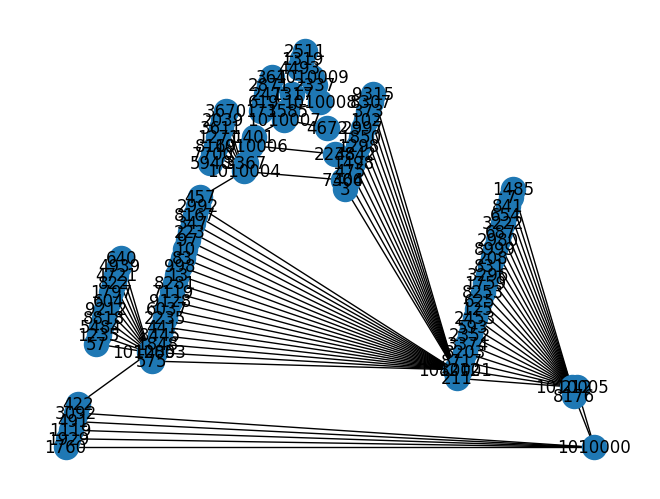

In [30]:
nx.draw_planar(G, with_labels=True)
plt.show()

## Creating the user and book graph

This graph will consist only of users and the books they have reviewed. The edges will contain the review metadata.

In [5]:
query = """
match (u:User)-[r:WROTE_REVIEW]-(re:Review)-[rr:IS_REVIEW_OF]-(b:Book) return u,r,re,rr,b
"""

results = driver.session().run(query)

G = nx.Graph()

nodes = list(results.graph()._nodes.values())
review_map = []
for node in nodes:
    node_type = list(node.labels)[0]
    if node_type != "Review":
        G.add_node(node_type + str(node.get("id")), labels=node._labels, properties=node._properties)
    else:
        review_map.append(pd.DataFrame([[node.element_id,node.get("rating")]],columns=["Review","Rating"]))

rels = list(results.graph()._relationships.values())
edgelist1 = []
edgelist2 = []
for rel in rels:
    if rel.type == "WROTE_REVIEW":
        edgelist1.append(pd.DataFrame([[list(rel.start_node.labels)[0] + str(rel.start_node.get("id")),list(rel.end_node.labels)[0] + str(rel.end_node.get("id"))]], columns=["User","Review"]))
    else:
        edgelist2.append(pd.DataFrame([[list(rel.start_node.labels)[0] + str(rel.start_node.get("id")),list(rel.end_node.labels)[0] + str(rel.end_node.get("id"))]], columns=["Review","Book"]))  

edgelist1 = pd.concat(edgelist1)
edgelist2 = pd.concat(edgelist2)
review_map = pd.concat(review_map)
final_edge =  edgelist1.merge(edgelist2,on="Review",how="inner")
final_edge =  final_edge.merge(review_map,on="Review",how="inner")

for ix, row in final_edge.iterrows():
    G.add_edge(row["User"], row["Book"], type="READ", properties={"rating":row["Rating"]})

In [6]:
## Find centrality 
centrality = nx.degree_centrality(G)
for item in dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True)).items():
    print(item)

('User6850', 0.0)
('Book1', 0.0)
('User1896', 0.0)
('User11967', 0.0)
('User186', 0.0)
('User15730', 0.0)
('User15358', 0.0)
('User15731', 0.0)
('User7580', 0.0)
('User4304', 0.0)
('User3747', 0.0)
('User3003', 0.0)
('User15632', 0.0)
('User14440', 0.0)
('User15718', 0.0)
('User15715', 0.0)
('User1518', 0.0)
('User7629', 0.0)
('User15623', 0.0)
('User15706', 0.0)
('User15686', 0.0)
('User2089', 0.0)
('User13308', 0.0)
('User15683', 0.0)
('User11020', 0.0)
('User1938', 0.0)
('User7004', 0.0)
('User1467', 0.0)
('User15698', 0.0)
('User2925', 0.0)
('User15682', 0.0)
('User15169', 0.0)
('User294', 0.0)
('User15669', 0.0)
('User6655', 0.0)
('User15668', 0.0)
('User3239', 0.0)
('User15672', 0.0)
('User1082', 0.0)
('User2742', 0.0)
('User13976', 0.0)
('User12972', 0.0)
('User2163', 0.0)
('User10433', 0.0)
('User10637', 0.0)
('User7770', 0.0)
('User3097', 0.0)
('User15380', 0.0)
('User15641', 0.0)
('User15636', 0.0)
('User13139', 0.0)
('User6970', 0.0)
('User15040', 0.0)
('User15631', 0.0)
('U